In [61]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
import stumpy
from sklearn.preprocessing import StandardScaler
from dao import DataLoading
from matplotlib.patches import Rectangle

In [3]:
def visualize_data(datafilename,data):
    fig,ax = plt.subplots(1,1,figsize = (15,15))
    test_data_start_pt = int(re.findall(r'[0-9]*.txt',datafilename)[0].split('.')[0])
    datasize = len(data)
    ax.plot(list(range(0,test_data_start_pt)),data[:test_data_start_pt],'b')
    ax.plot(list(range(test_data_start_pt,datasize)),data[test_data_start_pt:datasize],'r')


In [4]:
def return_normal_anoalous_data(datafilename,data):
    test_data_start_pt = int(re.findall(r'[0-9]*.txt',datafilename)[0].split('.')[0])
    return data[:test_data_start_pt], data[test_data_start_pt:len(data)]

In [ ]:
from dao import matrixprofile_bruteforce
import matplotlib.pyplot as plt
time_series = [0, 1, 3, 2, 9, 1, 14, 15, 1, 2, 2, 10, 7]
n = len(time_series)
m = 4

results_dict = matrixprofile_bruteforce.calculate_matrix_profile(time_series,m)
fig,ax = plt.subplots(2,1,figsize = (10,10))
ax[0].plot(range(len(time_series)),time_series, color = 'b')
ax[1].plot([i for i in results_dict],[results_dict[i] for i in results_dict], color = 'r')

In [5]:
train,test = DataLoading.split_data(file_path = DataLoading.file_path,index = 1)

In [9]:
#make the data into numpy arrays
train = np.array(train).reshape(-1,1)
test = np.array(test).reshape(-1,1)
scaler = StandardScaler()
scaler.fit(np.array(train))
train_scaled = scaler.transform(train)

In [13]:
test_scaled = scaler.transform(test)

In [20]:
data = np.concatenate((train_scaled,test_scaled))
data.shape

(79794, 1)

In [59]:

#stumpy.stump can take in 2 time series, A and B. A will be the test data, B will be the train data. A matrix profile will 
#include for each subsequence in A, its nearest neighbor in B. As the 2 subsequences are different, the ignore_trivial is set to False 
#https://stumpy.readthedocs.io/en/latest/api.html#stumpy.stump
#stumpy.stump will return a numpy array which contains the minimum euclidean distance from all the subsequences 
# in the train array that it was compared with
#The length of the mp array will be equal to len(test) - m + 1. Each index position of mp is the index of the test array and its respective
#subsequence
mp = stumpy.stump(test_scaled.reshape(44794,),100,train_scaled.reshape(35000,),ignore_trivial=False, normalize=False)

In [60]:
np.argsort(mp[:,0])[-1]

31860

C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


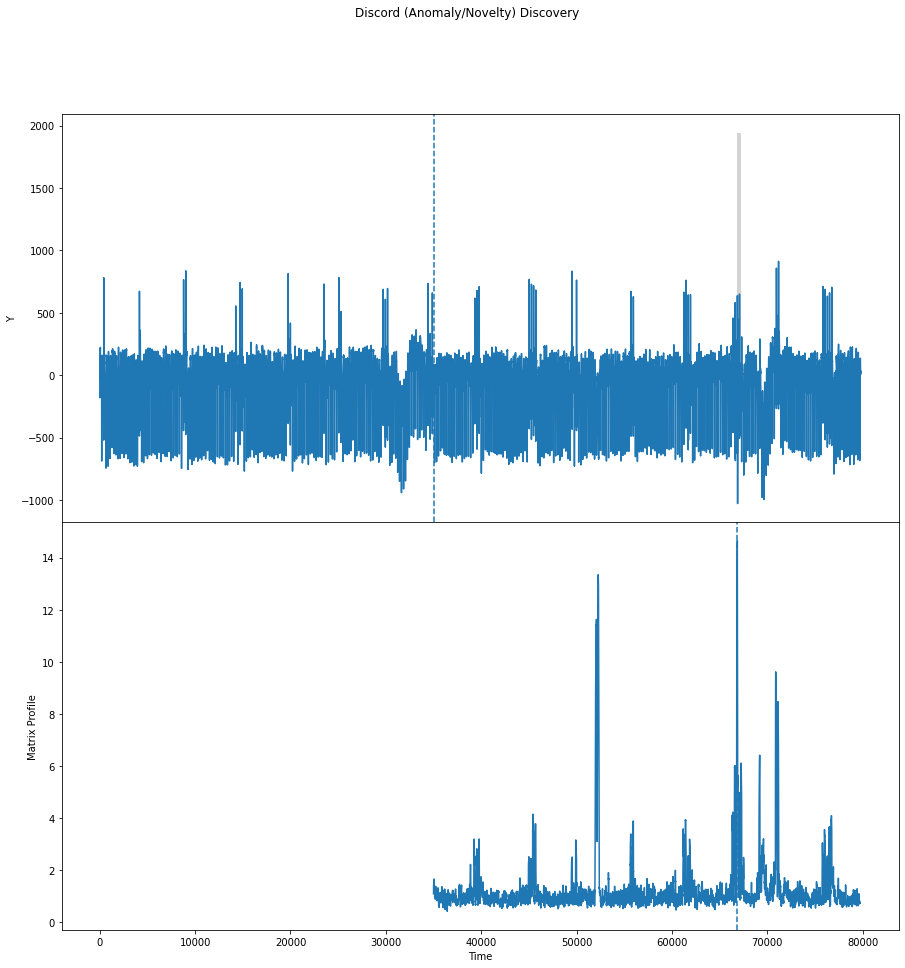

In [69]:
fig, axs = plt.subplots(2, figsize = (15,15), sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Anomaly/Novelty) Discovery')
axs[0].plot(np.concatenate((train,test)))
axs[0].set_ylabel('Y')
rect = Rectangle((np.argsort(mp[:,0])[-1] + 35000, 0), m, max(np.concatenate((train,test))) - min(np.concatenate((train,test))), facecolor='lightgrey')
axs[0].add_patch(rect)
axs[0].axvline(x = train.shape[0], linestyle = "dashed")
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Matrix Profile')
axs[1].axvline(x=np.argsort(mp[:,0])[-1] + 35000, linestyle="dashed")
axs[1].plot(list(range(train.shape[0], len(mp) + train.shape[0])),mp[:, 0])

In [58]:
np.mean(test[np.argsort(mp[:,0])[-1]:np.argsort(mp[:,0])[-1] + 350])

-218.24966069162005

array([[-142.92884 ],
       [-164.93265 ],
       [-178.50742 ],
       ...,
       [ -92.864084],
       [ -90.697107],
       [ -95.68738 ]])